### Perceptron investigation on iris dataset
Page 307 in the book.

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [9]:
iris = load_iris(as_frame=True)
type(iris)
print(iris.keys())
print(iris['data'][0:5])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris['target'] == 0).values

In [15]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

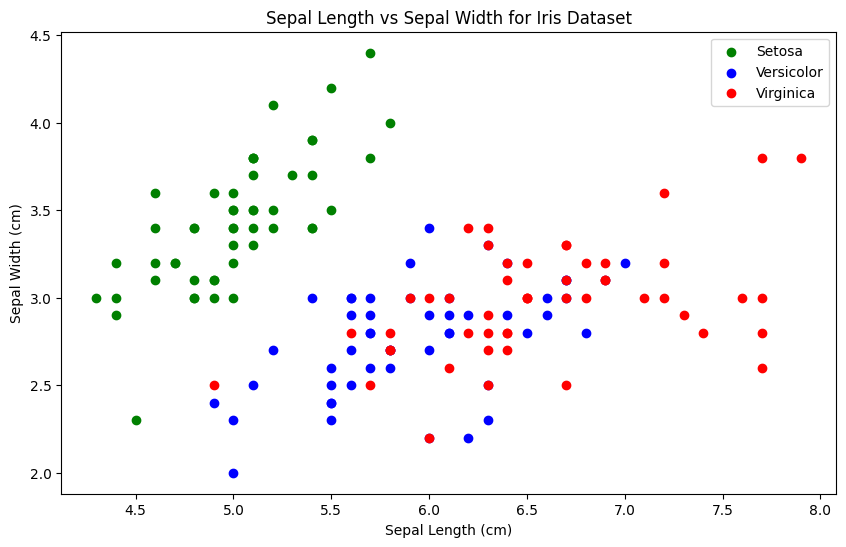

In [16]:
# Extract sepal length and sepal width
sepal_length = iris.data['sepal length (cm)']
sepal_width = iris.data['sepal width (cm)']

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(sepal_length[iris.target == 0], sepal_width[iris.target == 0], color='green', label='Setosa')
plt.scatter(sepal_length[iris.target == 1], sepal_width[iris.target == 1], color='blue', label='Versicolor')
plt.scatter(sepal_length[iris.target == 2], sepal_width[iris.target == 2], color='red', label='Virginica')

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width for Iris Dataset')
plt.legend()
plt.show()

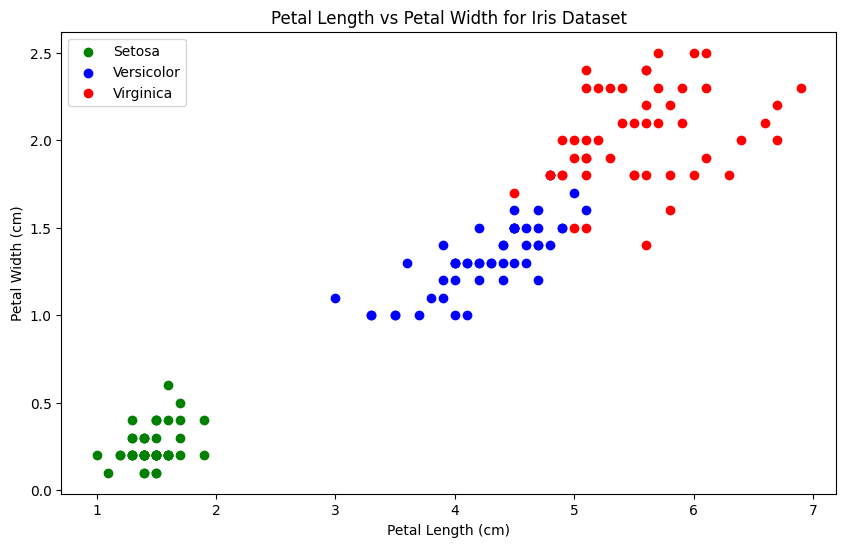

In [17]:
# Extract petal length and petal width
petal_length = iris.data['petal length (cm)']
petal_width = iris.data['petal width (cm)']

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(petal_length[iris.target == 0], petal_width[iris.target == 0], color='green', label='Setosa')
plt.scatter(petal_length[iris.target == 1], petal_width[iris.target == 1], color='blue', label='Versicolor')
plt.scatter(petal_length[iris.target == 2], petal_width[iris.target == 2], color='red', label='Virginica')

# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width for Iris Dataset')
plt.legend()
plt.show()

In [18]:
X_new = [[2, 0.5],[3, 1],[2, 0.5]]
y_pred = per_clf.predict(X_new)
print(y_pred)
weights = per_clf.coef_
bias = per_clf.intercept_
print("Weights:", weights)
print("Bias:", bias)

[ True False  True]
Weights: [[-1.4 -2.2]]
Bias: [4.]


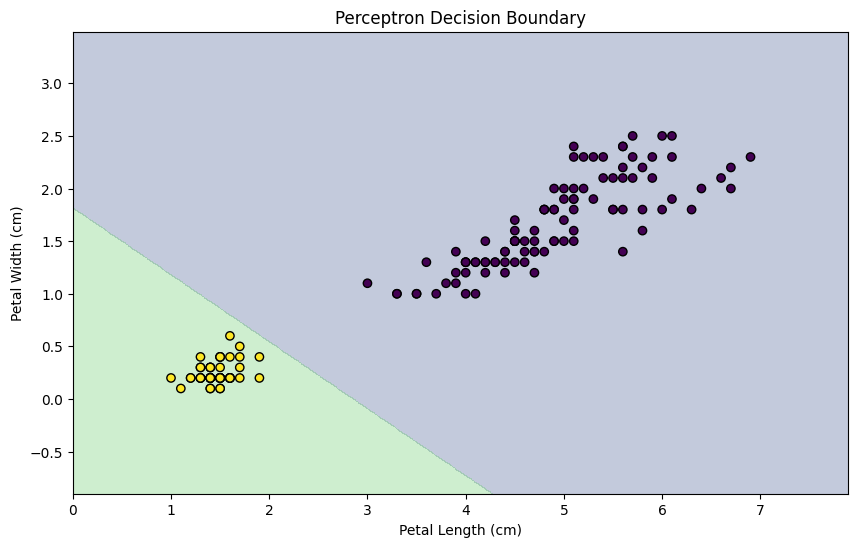

In [19]:
# Define the decision boundary plotting function
def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal Length (cm)')
    ax.set_ylabel('Petal Width (cm)')
    ax.set_title('Perceptron Decision Boundary')

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundary(per_clf, X, y, ax)
plt.show()

Tränar modellen med fyra inputs istället för två. Det är fortfarande bara en perceptron.

In [20]:
X = iris.data[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']].values #
y = (iris.target == 0) # Iris Setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [21]:
X_new = [[2, 0.5, 5, 3.5],[3, 1, 5.5, 2],[2, 0.5, 6, 3]]
y_pred = per_clf.predict(X_new)
print(y_pred)
weights = per_clf.coef_
bias = per_clf.intercept_
print("Weights:", weights)
print("Bias:", bias)

[ True False  True]
Weights: [[-6.2 -2.9  1.9  4.3]]
Bias: [1.]


Nedan är ett neuralt nätverk med tre outputs, en för varje art av iris. Den använder MLPClassifier. Machine_Learning_101 typ.

In [24]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Using all four features
y = iris.target  # Three classes: 0, 1, 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
mlp_clf.fit(X_train, y_train)

# Predict using the trained model
y_pred = mlp_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print predictions
print("Predictions:", y_pred)

Accuracy: 1.00
Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
